Visualizing the train image dataset's values using matplotlib.pyplot.imshow ,and reshaping the data to (28,28) dimensions for showing the images that has 28x28 pixels. Because, in this case, imshow is taking an input array that has (x,y) shape with RGB values 0-255. X corresponding to height, y corresponding to width of an image.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_csv('../data/mnist_train.csv')
label = X['label']
X = X.drop(columns = ['label'])
X = X.apply(lambda x: x.astype(float))
print(np.shape(X))
X = np.reshape(X.values,(-1,28,28,1)) # -1 indicates that the value is unknown.
print(np.shape(X))


(60000, 784)
(60000, 28, 28, 1)


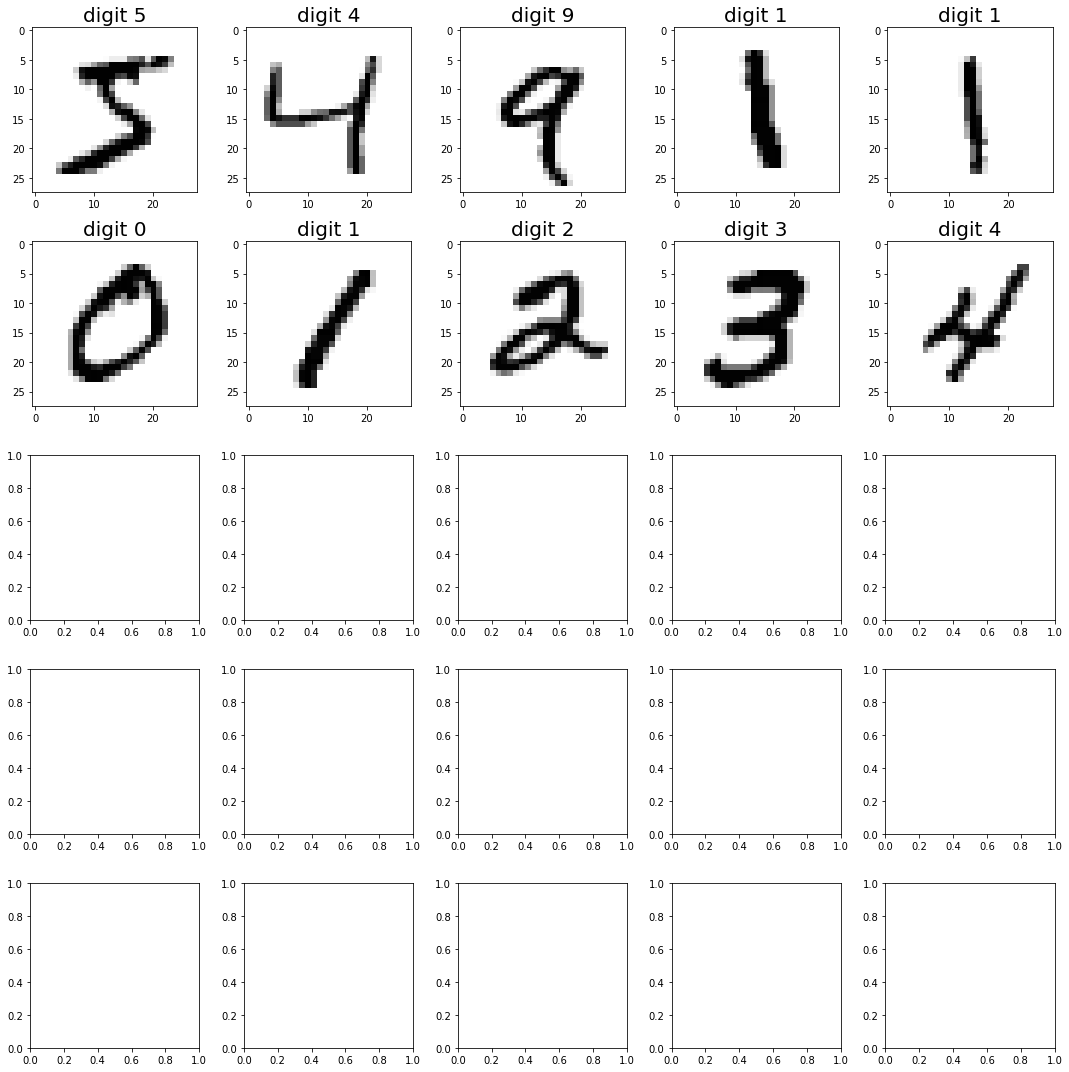

In [2]:
#Visualization of first ten digits, 25 boxes are used due to aesthetic reasons.(With 5,2 layout is not adequete)
fig, axs = plt.subplots(5,5,figsize = (15,15))
c = 0
for a in range(0,5):
    for b in range(0,2):
        axs[b][a].imshow(np.reshape(X[c][...,0],(28,28)),cmap = plt.cm.binary)
        axs[b][a].set_title("digit {}".format(label[c]),fontsize= 20)
        c = c + 1
        
    
fig.tight_layout()

Visualizing the count of labels using seaborn.distplot

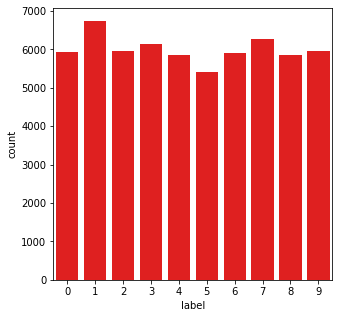

In [3]:
#Visualize amount of labels and corresponding values.
import seaborn as sns
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(label, color= 'red')


Standardizing the dataset and doing PCA on labels 0,1 and 2. 

In [11]:
from sklearn.preprocessing import StandardScaler
#We implemented the PCA analysis ourselves, responding the lecture's.
X = pd.read_csv('../data/mnist_train.csv')

X = X[(X['label'] == 2) |(X['label'] == 1) | (X['label'] == 0)]
y_01 = X['label']
X.drop(columns = ['label'])
X = X.values
# mean = X.mean(axis=0)
# X = X - mean
x = StandardScaler().fit_transform(X)
U,S,V = np.linalg.svd(X)
V = np.transpose(V)
#First 4 PCA's
Z = np.dot(X,(V[:,:4]))
A = np.dot(Z,np.transpose(V[:,:4]))


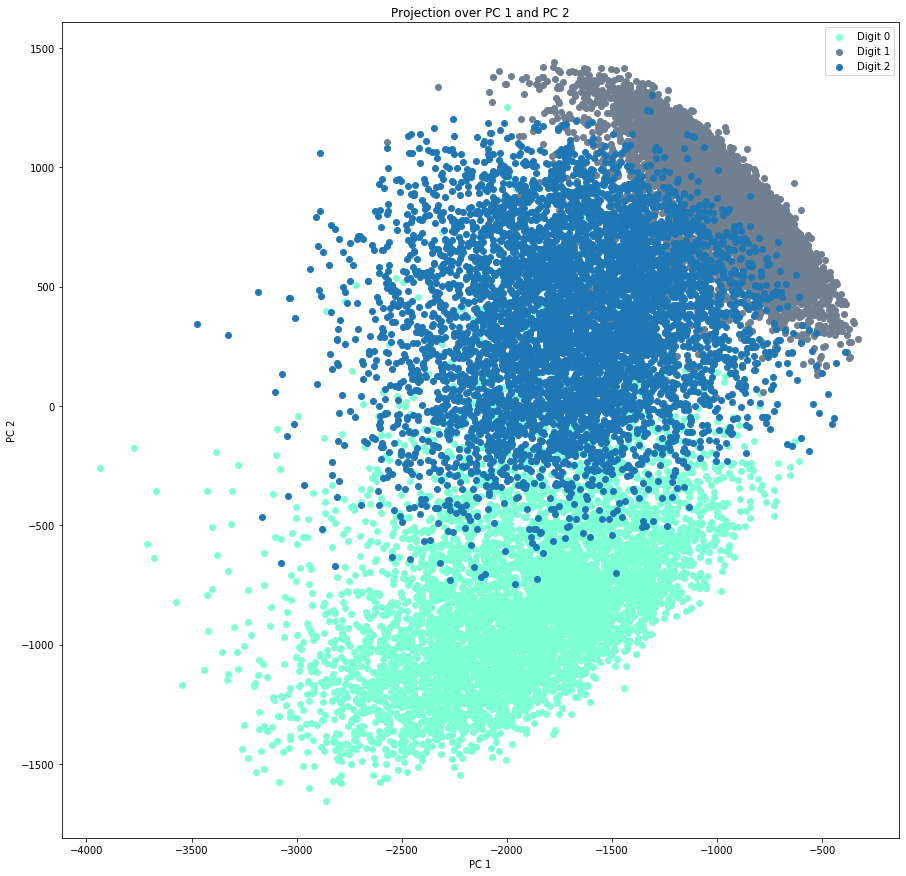

In [12]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 
#Visualize the digit 0,1 and 2 using first and second PCA.
fig, axs = plt.subplots(figsize=(15,15))
axs.scatter(Z[(y_01 == 0),0],Z[(y_01 ==0),1],c = "aquamarine", label = "Digit 0" )
axs.scatter(Z[(y_01 == 1),0],Z[(y_01 ==1),1], c = "slategray" , label = "Digit 1")
axs.scatter(Z[(y_01 == 2),0],Z[(y_01 ==2),1], label = "Digit 2" )
axs.set_title("Projection over PC 1 and PC 2")
axs.set_xlabel("PC 1")
axs.set_ylabel("PC 2")
axs.legend()


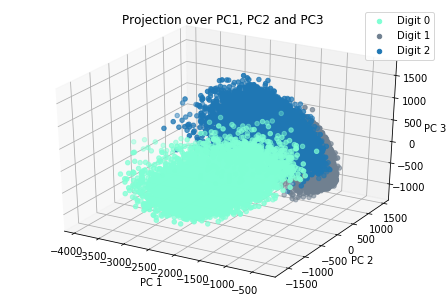

In [13]:
#Visualize the digit 0,1 and 2 using PC1, PC2 and PC3.
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Z[(y_01 == 0),0],Z[(y_01 ==0),1],Z[(y_01==0),2],c = "aquamarine", label = "Digit 0" )
ax.scatter(Z[(y_01 == 1),0],Z[(y_01 ==1),1],Z[(y_01==1),2], c = "slategray" , label = "Digit 1")
ax.scatter(Z[(y_01 == 2),0],Z[(y_01 ==2),1],Z[(y_01==2),2], label = "Digit 2" )
ax.set_title("Projection over PC1, PC2 and PC3")
ax.set_zlabel("PC 3")
ax.set_ylabel("PC 2")
ax.set_xlabel("PC 1")
ax.legend()

In [243]:
from keras.utils import to_categorical
#Prepare the train and test sets for support vector machine.
X_train = pd.read_csv('../data/mnist_train.csv')
y_train = X_train['label']
X_train = X_train.drop(columns = ['label'])
X_train = X_train.apply(lambda x: x.astype(float))
X_train = X_train.to_numpy()
X_test = pd.read_csv('../data/mnist_test.csv')
y_test = X_test['label']
X_test = X_test.drop(columns = ['label'])
X_test = X_test.to_numpy()
print(np.shape(X_train))

(60000, 784)


In [87]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [88]:
#Support vector machine, C = 0.001 due to soft-margin classification
clf = SVC(kernel = 'poly', degree = 3 , C= 0.001, gamma= 10 , verbose = True)
clf.fit(X_train,y_train)

[LibSVM]

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [90]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#Fuction for plotting confusion matrix given cm: Confusion matrix, y: true labels.
def plot_confusion_matrix(cm,y):
    df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                  columns = [i for i in np.unique(y)])
    plt.figure(figsize=(20,10))
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    bottom, top = plt.gca().get_ylim()
    plt.gca().set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

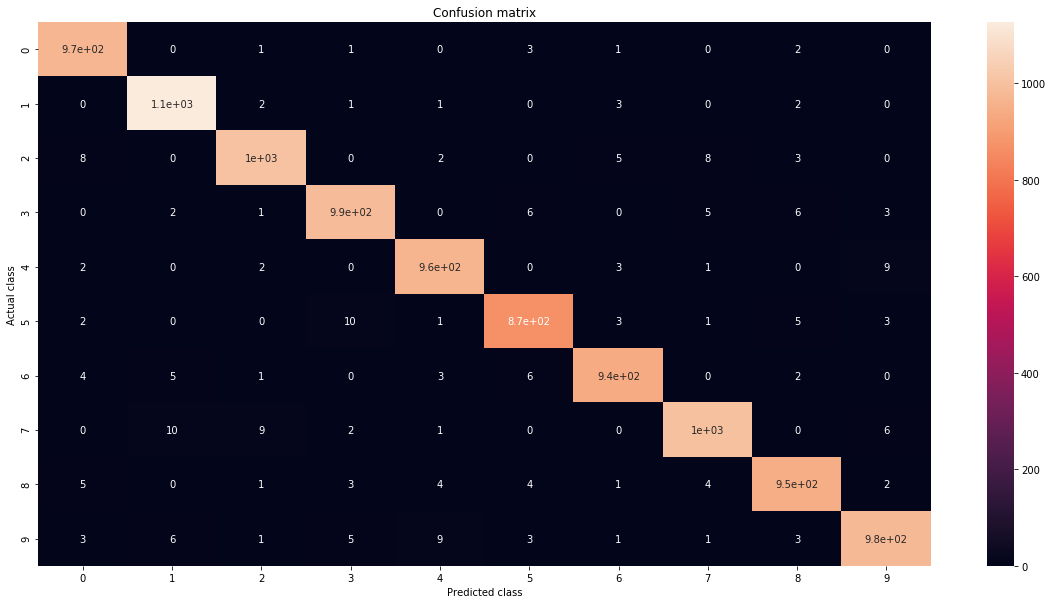

0.9787


In [244]:
predicted = clf.predict(X_test)
cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm,y_test)
print(accuracy_score(y_test,predicted))

In [176]:
from sklearn.metrics import roc_curve, auc
#Using sklearn.metrics to find false positive rate and true positive rate.
# i = digit number, fpr[i], tpr[i] if i = 0, corresponds to false positive rate of digit 0.
predict = to_categorical(predicted)
y_test_new = to_categorical(y_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_new[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

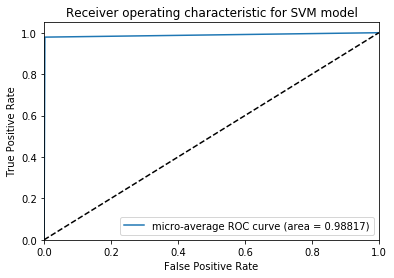

In [177]:

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new.ravel(), predict.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for SVM model')
plt.legend(loc="lower right")
plt.show()

In [217]:
from sklearn.metrics import f1_score,precision_score,recall_score
#Printing our f1_score, precision score and recall score.
print(f1_score(np.argmax(y_test_new,axis = 1),predicted , average = 'weighted'))
print(precision_score(np.argmax(y_test_new,axis = 1),predicted , average = 'weighted'))
print(recall_score(np.argmax(y_test_new,axis = 1),predicted , average = 'weighted'))

0.978686114992579
0.9787055529267229
0.9787


In [245]:
#Data preperation for CNN and ANN, notice that we need to shape the data to 2D images for CNN to extract futures.
X_test = pd.read_csv('../data/mnist_test.csv')
X_train = pd.read_csv('../data/mnist_train.csv')
y_test = X_test['label']
y_train = X_train['label']
X_train = X_train.drop(columns = ['label'])
X_test = X_test.drop(columns = ['label'])
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_train = np.reshape(X_train,(-1,28,28,1))
X_test = np.reshape(X_test,(-1,28,28,1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Great news! No need for you to train the model, we have provided the files for you to upload the model. Go to the other cell :)

In [152]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,SpatialDropout2D,AveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
model = Sequential()
model.add(Conv2D(30,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2)))
model.add(Conv2D(50,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2)))
model.add(SpatialDropout2D(0.25))
model.add(Flatten())
model.add(Dense(40,activation = "relu"))
model.add(Dense(10,activation = 'softmax'))
model.summary()
#Reducing learning rate depending on flactuation in validation loss. Reducing learning rate will help model to converge faster
#However, there is a possibility of over-fitting if learning rate reduced gradually.
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, verbose=1,
                              patience=2, min_lr=0.00000001)
#Using adam optimizer due to stated reasons in paper.
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
#Save the weights of the best model in file called weights.best_cnn.hdf5
filepath="weights.best_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#Log the model to csv file for further analysis.
csv_logger = CSVLogger("model_history_log_cnn.csv", append=True)
#Training the model can take up to 40 minutes. We have provided the files for you, so you can just skip to the other cell.
model.fit(X_train, y_train,
          batch_size=100,
          epochs=20,
          verbose=1, validation_data=(X_test,y_test),callbacks=[reduce_lr,checkpoint,csv_logger],shuffle=True)

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
batch_normalization_70 (Batc (None, 26, 26, 30)        120       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 11, 11, 50)        13550     
_________________________________________________________________
batch_normalization_71 (Batc (None, 11, 11, 50)        200       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 5, 5, 50)          0         
_________________________________________________________________
spatial_dropout2d_13 (Spatia (None, 5, 5, 50)        

In [232]:
#Delete the '#' in from of model if you want to upload the weights.
#model = Sequential()
model.load_weights('weights.best_cnn.hdf5')
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc,test_loss)

10000/10000 [==============================] - 8s 779us/step
Test accuracy: 0.9939000010490417 0.02199260569533126


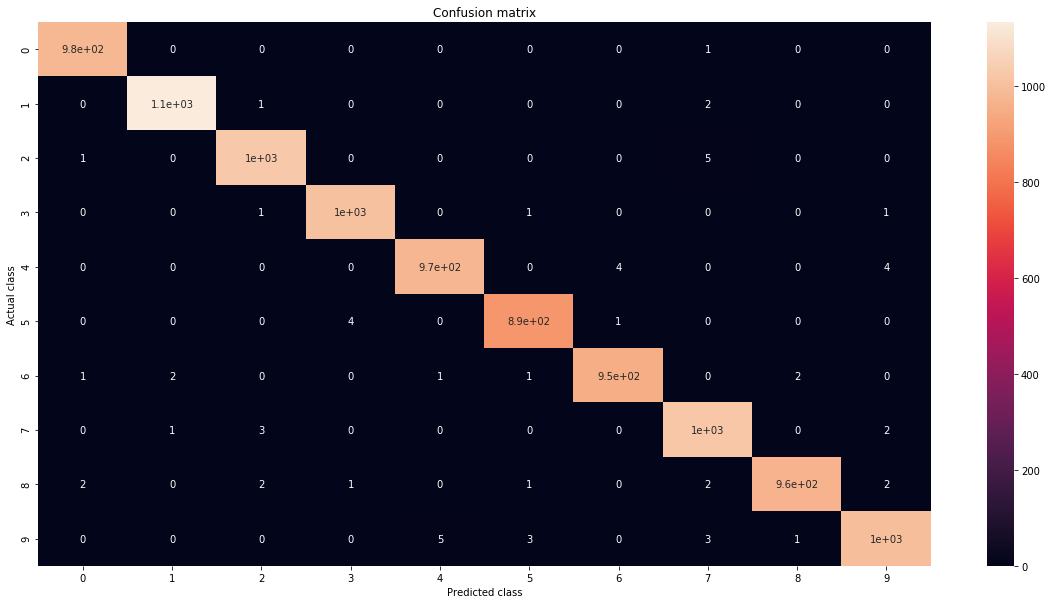

0.9939


In [236]:
#Plotting confusion matrix using plot_confusion_matrix.
predicted = model.predict_classes(X_test)
y_test_reverse = y_test.argmax(1)
cm = confusion_matrix(y_test_reverse,predicted)
plot_confusion_matrix(cm,y_test_reverse)
print(accuracy_score(y_test_reverse,predicted))

In [238]:
from sklearn.metrics import roc_curve, auc
predict_CNN = model.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predict_CNN[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

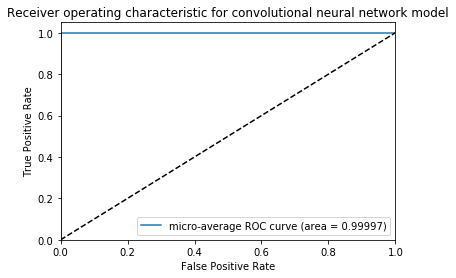

In [239]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predict_CNN.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for convolutional neural network model')
plt.legend(loc="lower right")
plt.show()

In [240]:
print(f1_score(y_test_reverse,np.argmax(predict_CNN,axis = 1) , average = 'weighted'))
print(precision_score(y_test_reverse,np.argmax(predict_CNN,axis =1) , average = 'weighted'))
print(recall_score(y_test_reverse,np.argmax(predict_CNN,axis=1) , average = 'weighted'))

0.9938993761255656
0.9939052246196024
0.9939


In [145]:
#Importing the framework to create ANN
from keras.layers import Dense,BatchNormalization,Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

Great news! No need for you to train the model, we have provided the files for you to upload the model. Go to the other cell :)

In [146]:
model1 = Sequential()
model1.add(Flatten(input_shape = (28,28,1)))
model1.add(Dense(784,activation = "relu"))
model1.add(BatchNormalization())
model1.add(Dense(10,activation = "relu"))
model1.add(BatchNormalization())
model1.add(Dense(10,activation = "softmax"))
model1.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, verbose=1,
                                  patience=2, min_lr=0.00000001)
model1.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_logger = CSVLogger("model_history_log.csv", append=True)
model1.fit(X_train, y_train,
              batch_size=100,
              epochs=20,
              verbose=1,validation_data = (X_test,y_test), callbacks = [reduce_lr,checkpoint,csv_logger],shuffle = True)
accuracy.append(model.evaluate(X_test, y_test))
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print('Test accuracy:', test_acc)

(60000, 28, 28, 1)
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_50 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_124 (Dense)            (None, 784)               615440    
_________________________________________________________________
batch_normalization_68 (Batc (None, 784)               3136      
_________________________________________________________________
dense_125 (Dense)            (None, 10)                7850      
_________________________________________________________________
batch_normalization_69 (Batc (None, 10)                40        
_________________________________________________________________
dense_126 (Dense)            (None, 10)                110       
Total params: 626,576
Trainable params: 624,988
Non-trainable params: 1,588
________________________

In [233]:
#model1 = Sequential()
model1.load_weights("weights.best.hdf5")
test_loss, test_acc = model1.evaluate(X_t, y_t)
print('Test accuracy:', test_acc,test_loss)

10000/10000 [==============================] - 18s 2ms/step
Test accuracy: 0.9833999872207642 0.10055821339611139


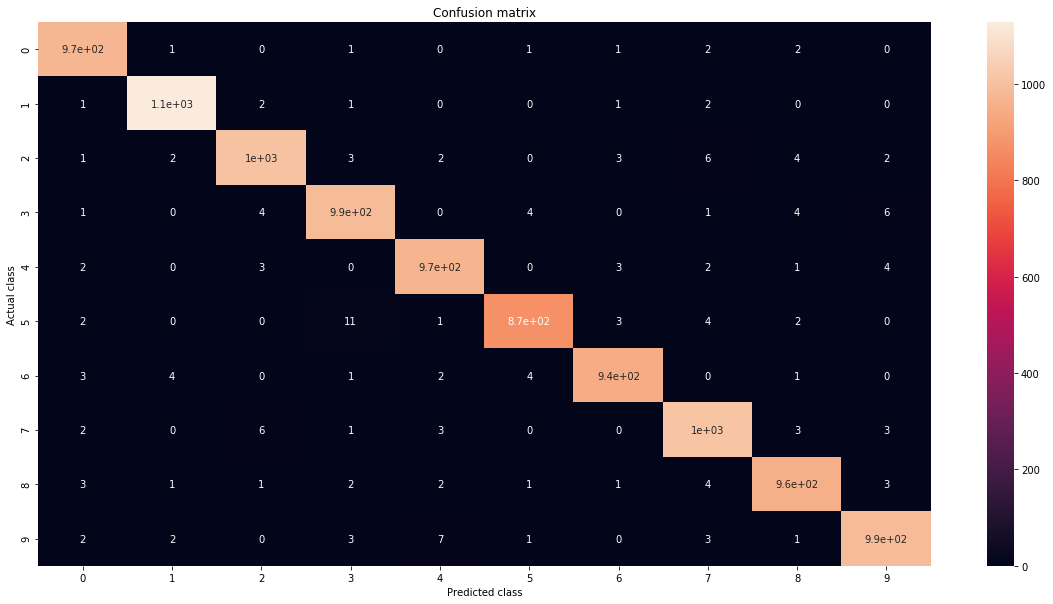

0.9834


In [234]:
predicted_CNN = model1.predict_classes(X_test)
cm = confusion_matrix(y_test_reverse,predicted)
plot_confusion_matrix(cm,y_test_reverse)
print(accuracy_score(y_test_reverse,predicted))

In [221]:
from sklearn.metrics import roc_curve, auc
predict_ANN = model1.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predict_ANN[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

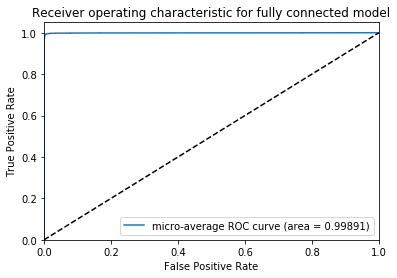

In [222]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predict_ANN.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for fully connected model')
plt.legend(loc="lower right")
plt.show()

0.99993336 0.9833999872207642


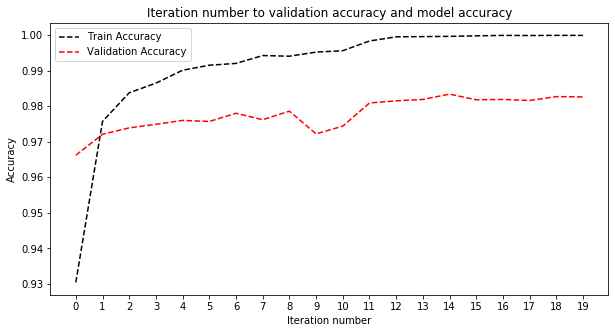

In [199]:
#From the log files that we have provided, you can check how train accuracy and validation accuracy is related.
ANN = pd.read_csv('model_history_log.csv')
val_accuracy = ANN['val_accuracy']
model_accuracy = ANN['accuracy']
epoch = [a for a in range(0,len(ANN))]
loss = ANN['loss']
loss_val = ANN['val_loss']
plt.figure(figsize=(10,5))
plt.plot(epoch,model_accuracy, 'k--',label = 'Train Accuracy')
plt.plot(epoch,val_accuracy, 'r--',label = "Validation Accuracy")
plt.legend()
plt.xticks(epoch)
plt.xlabel("Iteration number")
plt.ylabel("Accuracy")
plt.title("Iteration number to validation accuracy and model accuracy")
print(max(model_accuracy),max(val_accuracy))

0.0006727022745568926 0.08544370361836627


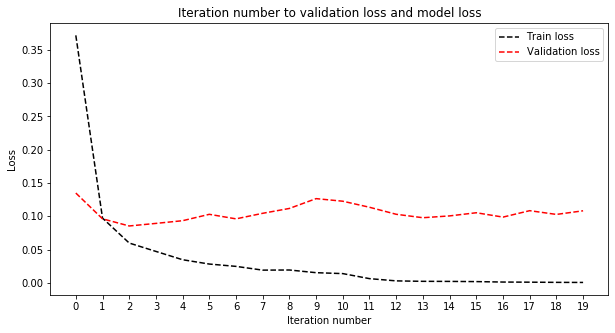

In [200]:
#Plotting train loss and validation loss for ANN
plt.figure(figsize=(10,5))
plt.plot(epoch,loss, 'k--',label = 'Train loss')
plt.plot(epoch,loss_val, 'r--',label = "Validation loss")
plt.legend()
plt.xticks(epoch)
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.title("Iteration number to validation loss and model loss")
print(min(loss),min(loss_val))

In [225]:
#F1, precision,recall score for ANN model
print(f1_score(y_test_reverse,np.argmax(predict_ANN,axis = 1) , average = 'weighted'))
print(precision_score(y_test_reverse,np.argmax(predict_ANN,axis =1) , average = 'weighted'))
print(recall_score(y_test_reverse,np.argmax(predict_ANN,axis=1) , average = 'weighted'))

0.983396579412193
0.9834108174334164
0.9834


0.9993167 0.9939000010490416


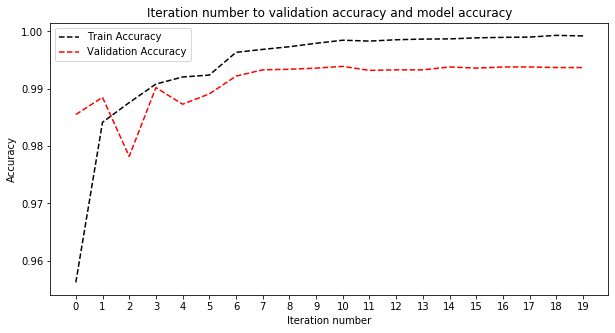

In [226]:
#From the files we have provided you can check validation accuracy and train accuracy of CNN model.
CNN = pd.read_csv('model_history_log_cnn.csv')
val_accuracy = CNN['val_accuracy']
model_accuracy = CNN['accuracy']
epoch = [a for a in range(0,len(CNN))]
loss = CNN['loss']
loss_val = CNN['val_loss']
plt.figure(figsize=(10,5))
plt.plot(epoch,model_accuracy, 'k--',label = 'Train Accuracy')
plt.plot(epoch,val_accuracy, 'r--',label = "Validation Accuracy")
plt.legend()
plt.xticks(epoch)
plt.xlabel("Iteration number")
plt.ylabel("Accuracy")
plt.title("Iteration number to validation accuracy and model accuracy")
print(max(model_accuracy),max(val_accuracy))

0.0034734110096906077 0.021721764417991386


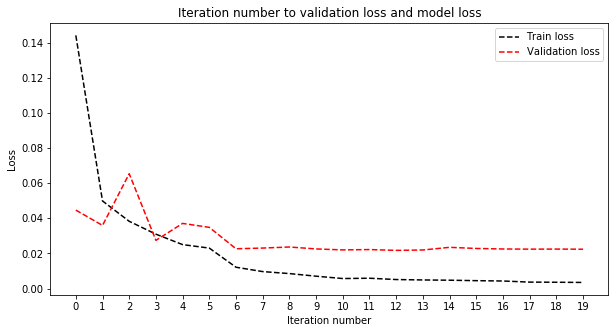

In [227]:
#Plotting train loss and validation loss
plt.figure(figsize=(10,5))
plt.plot(epoch,loss, 'k--',label = 'Train loss')
plt.plot(epoch,loss_val, 'r--',label = "Validation loss")
plt.legend()
plt.xticks(epoch)
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.title("Iteration number to validation loss and model loss")
print(min(loss),min(loss_val))

In [249]:
#Finding the wrongly predicted digits.
#Mask is used as indices of wrong predictions.
mask_ANN = np.logical_not(np.equal(y_test_reverse, np.argmax(predict_ANN,axis = 1)))
mask_CNN = np.logical_not(np.equal(y_test_reverse, np.argmax(predict_CNN,axis = 1)))
mask_SVM = np.logical_not(np.equal(y_test_reverse,predicted))
ANN_wrong_X = X_test[mask_ANN]
CNN_wrong_X = X_test[mask_CNN]
SVM_wrong_X = X_test[mask_SVM]
ANN_wrong_y = y_test_reverse[mask_ANN]
CNN_wrong_y = y_test_reverse[mask_CNN]
SVM_wrong_y = y_test_reverse[mask_SVM]
ANN_wrong_pred =np.argmax(predict_ANN,axis = 1)[mask_ANN]
CNN_wrong_pred =np.argmax(predict_CNN,axis = 1)[mask_CNN]
SVM_wrong_pred =predicted[mask_SVM]

In [319]:
def findWrong_25(X,y,pred):
    '''
    Find the first 25 digits that have been falsely predicited.
    X: Wrong predicitions of model
    y: True labels
    pred: Wrong predictions.
    '''
    fig,axs = plt.subplots(5,5 ,figsize =(15,15))
    c = 0
    for a in range(5):
        for b in range(5):
            
                
            axs[a][b].imshow(np.reshape(X[c],(28,28)),cmap = plt.cm.binary)
            axs[a][b].set_title("{} is classified as {}".format(y[c],pred[c]),fontsize = 20)
            c = c + 1
    fig.tight_layout()
    
    
    
        

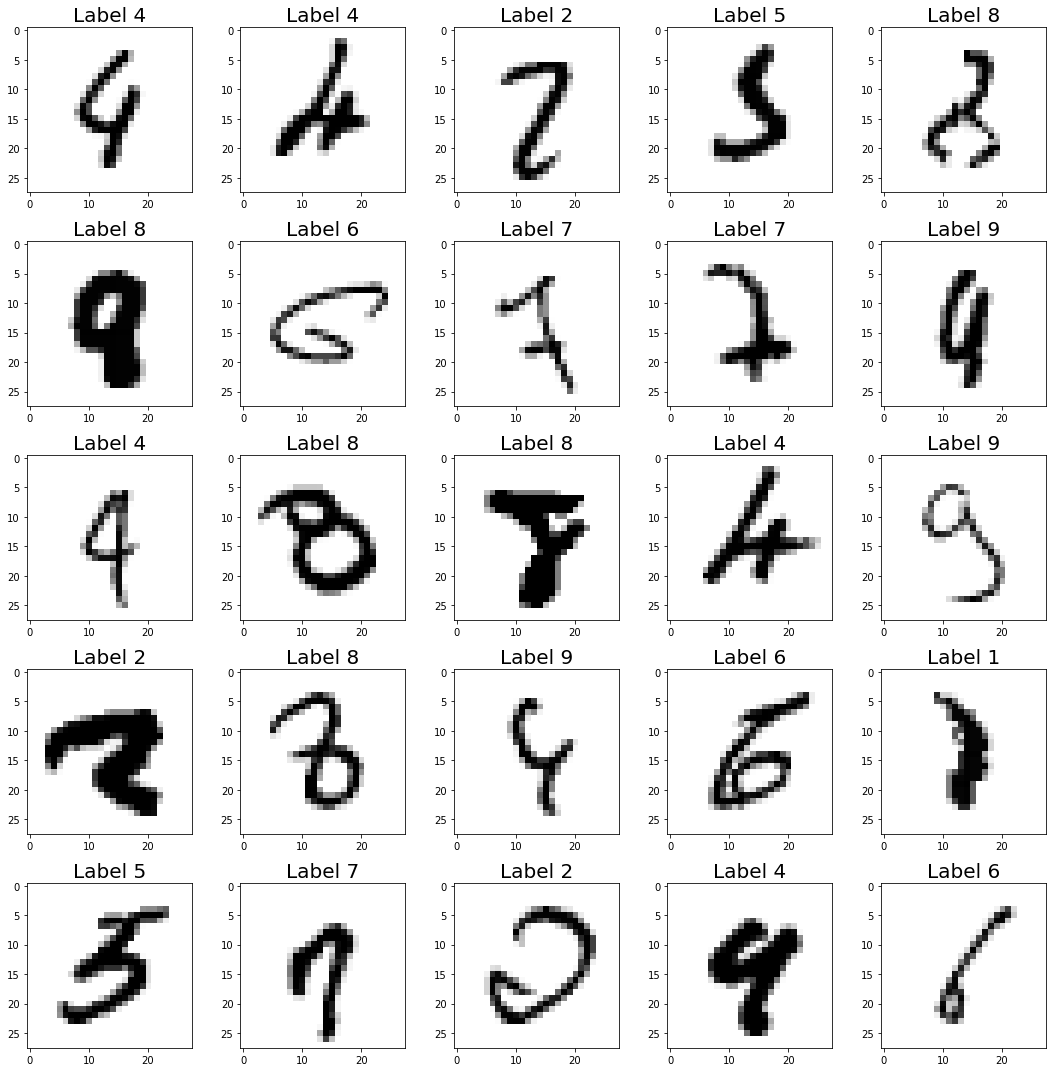

In [350]:
#Finding 25 wrongly classified digits by all models
fig,axs = plt.subplots(5,5,figsize = (15,15))
c = 0 
same = []
label = []
for y,X in enumerate(CNN_wrong_X):
    if X in ANN_wrong_X and X in SVM_wrong_X:
        same.append(X)
        label.append(CNN_wrong_y[y])
        
for a in range(5):
        for b in range(5):    
            axs[a][b].imshow(np.reshape(same[c],(28,28)),cmap = plt.cm.binary)
            axs[a][b].set_title("Label {}".format(label[c]), fontsize = 20)
            c = c + 1
fig.tight_layout()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18